In [61]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gennorm, norm, t
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler

## Problem1

In [2]:
p1 = pd.read_csv('problem1.csv')
portfolio = pd.read_csv('portfolio.csv')
prices = pd.read_csv('DailyPrices.csv', index_col=0)

In [23]:
# Fit Normal Distribution
mu, std = stats.norm.fit(p1)
norm_dist = stats.norm(mu, std)

In [ ]:
# Fit Generalized T Distribution
df, loc, scale = stats.t.fit(p1)
gt_dist = stats.t(df, loc, scale)

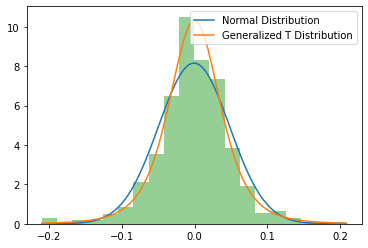

In [ ]:
# Plot PDFs
x = np.linspace(p1.min(), p1.max(), 100)
plt.plot(x, norm_dist.pdf(x), label='Normal Distribution')
plt.plot(x, gt_dist.pdf(x), label='Generalized T Distribution')
plt.hist(p1, density=True, alpha=0.5, bins=20)
plt.legend()
plt.show()

In [ ]:
# Calculate VaR and ES for Normal Distribution
alpha = 0.05
norm_var = -norm_dist.ppf(alpha)
norm_es = -norm_dist.expect(lambda x: x, lb=-np.inf, ub=-norm_var)/alpha

print('Normal Distribution:')
print('VaR: {:.2f}'.format(norm_var))
print('ES: {:.2f}'.format(norm_es))

# Calculate VaR and ES for Generalized T Distribution
gt_var = -gt_dist.ppf(alpha)
gt_es = -gt_dist.expect(lambda x: x, lb=-np.inf, ub=-gt_var)/alpha

print('Generalized T Distribution:')
print('VaR: {:.2f}'.format(gt_var))
print('ES: {:.2f}'.format(gt_es))

Normal Distribution:
VaR: 0.08
ES: 0.10
Generalized T Distribution:
VaR: 0.08
ES: 0.11


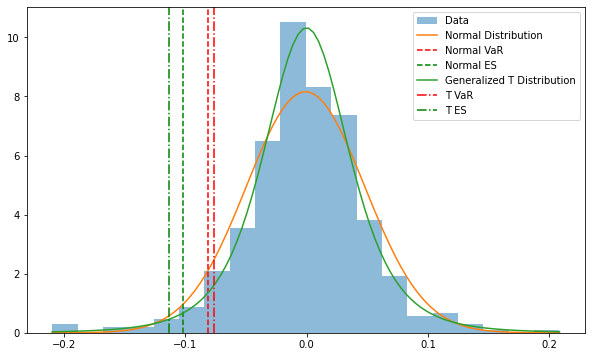

In [ ]:
# plot PDFs and VaR/ES values for both distributions
x = np.linspace(np.min(p1), np.max(p1), 100)
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(p1, density=True, bins=20, alpha=0.5, label='Data')
plt.plot(x, norm_dist.pdf(x), label='Normal Distribution')
plt.axvline(x=-norm_var, color='r', linestyle='--', label='Normal VaR')
plt.axvline(x=-norm_es, color='g', linestyle='--', label='Normal ES')
plt.plot(x, gt_dist.pdf(x), label='Generalized T Distribution')
plt.axvline(x=-gt_var, color='r', linestyle='-.', label='T VaR')
plt.axvline(x=-gt_es, color='g', linestyle='-.', label='T ES') 
plt.legend()
plt.show()

## Problem 2

In [13]:
import covariance_estimation_techniques, non_psd_fixes, simulation_methods, var

In [17]:
x = covariance_estimation_techniques.exp_weighted_cov(prices)
x

array([[ 196.34093027,  108.25923393,  191.18461561, ...,   28.0052373 ,
          38.17250442,  -11.49601007],
       [ 108.25923393,  156.67412399,  219.62200616, ...,   20.66741424,
          28.26122085, -112.83458867],
       [ 191.18461561,  219.62200616,  392.69502911, ...,   26.9884322 ,
          44.83603466, -175.37552592],
       ...,
       [  28.0052373 ,   20.66741424,   26.9884322 , ...,    7.01067245,
           4.87910237,   -1.4646528 ],
       [  38.17250442,   28.26122085,   44.83603466, ...,    4.87910237,
          10.89000699,  -14.74500246],
       [ -11.49601007, -112.83458867, -175.37552592, ...,   -1.4646528 ,
         -14.74500246,  161.00830859]])

In [18]:
non_psd_fixes.near_psd(x)

array([[ 196.34093027,  108.25923393,  191.18461561, ...,   28.0052373 ,
          38.17250442,  -11.49601007],
       [ 108.25923393,  156.67412399,  219.62200616, ...,   20.66741424,
          28.26122085, -112.83458867],
       [ 191.18461561,  219.62200616,  392.69502911, ...,   26.9884322 ,
          44.83603466, -175.37552592],
       ...,
       [  28.0052373 ,   20.66741424,   26.9884322 , ...,    7.01067245,
           4.87910237,   -1.4646528 ],
       [  38.17250442,   28.26122085,   44.83603466, ...,    4.87910237,
          10.89000699,  -14.74500246],
       [ -11.49601007, -112.83458867, -175.37552592, ...,   -1.4646528 ,
         -14.74500246,  161.00830859]])

In [20]:
y = simulation_methods.chol_psd(x)
y

array([[ 1.40121708e+01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.72608581e+00,  9.84792983e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.36441825e+01,  1.15969430e+01,  8.48776915e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.99863659e+00,  5.30647202e-01, -7.58175147e-01, ...,
         2.04901186e-01,  0.00000000e+00,  0.00000000e+00],
       [ 2.72423916e+00,  7.32490527e-01, -9.76266642e-02, ...,
         7.63101267e-03,  1.48420394e-01,  0.00000000e+00],
       [-8.20430342e-01, -1.08140366e+01, -4.56794451e+00, ...,
        -1.29361853e-01, -2.37712861e-02,  2.31190284e-01]])

In [22]:
z = simulation_methods.direct_simulation(y, 1000)
z

array([[ 0.62352233, -2.1128008 , -2.19092436, ..., -8.71393462,
        -0.71356967,  1.62810171],
       [ 3.76212169, -0.37385063,  1.43109596, ..., -6.19969029,
         0.76358972,  1.8890939 ],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

## Problem 3

In [80]:
import var as v
import simulation_methods as s

In [45]:
returns = prices.pct_change().dropna(how='all')
returns = returns - np.mean(returns)
#returns.head()

d:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [55]:
#get the most recent prices
def portfolio_price(prices, portfolio):
    pv = []
    for stock in portfolio:
        pv.append(prices.iloc[-1][stock])
    return pv

In [133]:
# Get the list of stocks in each portfolio
portfolio_A = portfolio[portfolio['Portfolio'] == 'A']['Stock'].tolist()
portfolio_B = portfolio[portfolio['Portfolio'] == 'B']['Stock'].tolist()
portfolio_C = portfolio[portfolio['Portfolio'] == 'C']['Stock'].tolist()
portfolio_t = portfolio['Stock'].tolist()

# Get the number of holdings for each stock in each portfolio
holdings_A = portfolio[portfolio['Portfolio'] == 'A']['Holding'].tolist()
holdings_B = portfolio[portfolio['Portfolio'] == 'B']['Holding'].tolist()
holdings_C = portfolio[portfolio['Portfolio'] == 'C']['Holding'].tolist()
holdings_t = portfolio['Holding'].tolist()

# Get the daily prices for the stocks in each portfolio
portfolio_A_prices = prices[portfolio_A].values
portfolio_B_prices = prices[portfolio_B].values
portfolio_C_prices = prices[portfolio_C].values
portfolio_t_prices = prices[portfolio_t].values

# Calculate the daily returns for each portfolio
portfolio_A_returns = np.diff(np.log(portfolio_A_prices), axis=0)
portfolio_B_returns = np.diff(np.log(portfolio_B_prices), axis=0)
portfolio_C_returns = np.diff(np.log(portfolio_C_prices), axis=0)
portfolio_t_returns = np.diff(np.log(portfolio_t_prices), axis=0)

In [69]:
portfolio_A_returns.shape

(248, 35)

In [120]:
#simulation
def cal_t_pVals(port, returns_port, price):
    return_cdf=[]
    par=[]
    returns_port = pd.DataFrame(returns_port)
    for col in returns_port.columns:
        df, loc, scale = t.fit(returns_port[col].values)
        par.append([df,loc,scale])
        return_cdf.append(t.cdf(returns_port[col].values, df=df, loc=loc, scale=scale).tolist())
    return_cdf=pd.DataFrame(return_cdf).T
    spearman_cor=return_cdf.corr(method='spearman')
    sample=pd.DataFrame(s.simulate_pca(spearman_cor, 10000, 0.95)).T

    sample_cdf=[]
    for col in sample.columns:
        sample_cdf.append(norm.cdf(sample[col].values, loc=0, scale=1).tolist())
        
    simu_return=[]
    for i in range(len(sample_cdf)):
        simu_return.append(t.ppf(sample_cdf[i], df=par[i][0], loc=par[i][1], scale=par[i][2]))
    simu_return=np.array(simu_return)
    
    sim_price=(1 + simu_return.T)*price
    pVals = sim_price.dot(port)
    pVals.sort()
    return pVals

In [125]:
pv = np.sum(np.array(holdings_A)*np.array(portfolio_price(prices, portfolio_A)))
VaR = v.calculate_var(cal_t_pVals(holdings_A, portfolio_A_returns, portfolio_price(prices, portfolio_A)), pv)
CVaR = v.calculate_es(pv-cal_t_pVals(holdings_A, portfolio_A_returns, portfolio_price(prices, portfolio_A)), VaR)
print("portfolio A")
print("VaR =", VaR)
print("ES =", CVaR)

Simulating with 22 PC Factors: 95.01 % total variance explained
Simulating with 22 PC Factors: 95.01 % total variance explained
portfolio A
VaR = 8119.592085576267
ES = 10699.212707121353


In [126]:
pv = np.sum(np.array(holdings_B)*np.array(portfolio_price(prices, portfolio_B)))
VaR = v.calculate_var(cal_t_pVals(holdings_B, portfolio_B_returns, portfolio_price(prices, portfolio_B)), pv)
CVaR = v.calculate_es(pv-cal_t_pVals(holdings_B, portfolio_B_returns, portfolio_price(prices, portfolio_B)), VaR)
print("portfolio B")
print("VaR =", VaR)
print("ES =", CVaR)

Simulating with 23 PC Factors: 95.47 % total variance explained
Simulating with 23 PC Factors: 95.47 % total variance explained
portfolio B
VaR = 6707.263129159866
ES = 8815.59925480243


In [128]:
pv = np.sum(np.array(holdings_C)*np.array(portfolio_price(prices, portfolio_C)))
VaR = v.calculate_var(cal_t_pVals(holdings_C, portfolio_C_returns, portfolio_price(prices, portfolio_C)), pv)
CVaR = v.calculate_es(pv-cal_t_pVals(holdings_C, portfolio_C_returns, portfolio_price(prices, portfolio_C)), VaR)
print("portfolio C")
print("VaR =", VaR)
print("ES =", CVaR)

Simulating with 23 PC Factors: 95.27 % total variance explained
Simulating with 23 PC Factors: 95.27 % total variance explained
portfolio C
VaR = 5580.703319037799
ES = 7376.550165893091


In [134]:
pv = np.sum(np.array(holdings_t)*np.array(portfolio_price(prices, portfolio_t)))
VaR = v.calculate_var(cal_t_pVals(holdings_t, portfolio_t_returns, portfolio_price(prices, portfolio_t)), pv)
CVaR = v.calculate_es(pv-cal_t_pVals(holdings_t, portfolio_t_returns, portfolio_price(prices, portfolio_t)), VaR)
print("portfolio total")
print("VaR =", VaR)
print("ES =", CVaR)

Simulating with 52 PC Factors: 95.03 % total variance explained
Simulating with 52 PC Factors: 95.03 % total variance explained
portfolio total
VaR = 20293.365268705296
ES = 26671.293641570177
